# Project: Electricity Prices vs Population

There has been a diversification of electricity sources in the past few decades. This has led to a rising and lowering cost in the electricity depending on the source diversification and, of course, the location within the United States. We are interested in determining whether the population density will add to the cost.

In [1]:
# Dependencies and Setup
import requests
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
from scipy.stats import sem
from scipy.stats import linregress

# Import API key
from Gabriel_Key import g_key, EIA_Key

In [2]:
# Study data files
# data_example = "data/example.csv"

## Save config information & build the query URL

In [3]:
# Retail sales of electricity : Texas : all sectors : annua
url = "http://api.eia.gov/series/?"

series_id = "ELEC.SALES.TX-ALL.A"

# Build query URL
query_url = url + "api_key=" + EIA_Key + "&series_id=" + series_id

print(query_url)

http://api.eia.gov/series/?api_key=ece1bdd76c031181809dd3bc0981ec95&series_id=ELEC.SALES.TX-ALL.A


In [4]:
# Number of customer accounts : Texas : residential : annual
series_id = "ELEC.CUSTOMERS.TX-RES.A"

# Build query URL
query_url = url + "api_key=" + EIA_Key + "&series_id=" + series_id

print(query_url)

http://api.eia.gov/series/?api_key=ece1bdd76c031181809dd3bc0981ec95&series_id=ELEC.CUSTOMERS.TX-RES.A


## Get weather data

In [5]:
# Request data using the API
eia_response = requests.get(query_url).json()

In [6]:
# Print the response of the request
pprint(eia_response)

{'request': {'command': 'series', 'series_id': 'ELEC.CUSTOMERS.TX-RES.A'},
 'series': [{'copyright': 'None',
             'data': [['2019', 11055522.916666666],
                      ['2018', 11148781.416666666],
                      ['2017', 10809487.666666666],
                      ['2016', 10521731.083333334],
                      ['2015', 10317999.416666666],
                      ['2014', 10138871.166666666],
                      ['2013', 9954290.333333334],
                      ['2012', 9802101.666666666],
                      ['2011', 9621479.583333334],
                      ['2010', 9536767.416666666],
                      ['2009', 9491965.5],
                      ['2008', 9461512.583333334]],
             'description': 'Electricity sold to residential customers; '
                            'Electricity sold to residential customers; ',
             'end': '2019',
             'f': 'A',
             'geography': 'USA-TX',
             'iso3166': 'USA-TX',
          

In [7]:
# Retrieve the keys from the JSON data request
eia_response.keys()

dict_keys(['request', 'series'])

In [8]:
# Access the request data using the keys
eia_response['series']

[{'series_id': 'ELEC.CUSTOMERS.TX-RES.A',
  'name': 'Number of customer accounts : Texas : residential : annual',
  'units': 'number of customers',
  'f': 'A',
  'description': 'Electricity sold to residential customers; Electricity sold to residential customers; ',
  'copyright': 'None',
  'source': 'EIA, U.S. Energy Information Administration',
  'iso3166': 'USA-TX',
  'geography': 'USA-TX',
  'start': '2008',
  'end': '2019',
  'updated': '2020-03-23T18:31:14-0400',
  'data': [['2019', 11055522.916666666],
   ['2018', 11148781.416666666],
   ['2017', 10809487.666666666],
   ['2016', 10521731.083333334],
   ['2015', 10317999.416666666],
   ['2014', 10138871.166666666],
   ['2013', 9954290.333333334],
   ['2012', 9802101.666666666],
   ['2011', 9621479.583333334],
   ['2010', 9536767.416666666],
   ['2009', 9491965.5],
   ['2008', 9461512.583333334]]}]

In [9]:
# Accessing the data inside the list
data = eia_response['series'][0]['data']
data

[['2019', 11055522.916666666],
 ['2018', 11148781.416666666],
 ['2017', 10809487.666666666],
 ['2016', 10521731.083333334],
 ['2015', 10317999.416666666],
 ['2014', 10138871.166666666],
 ['2013', 9954290.333333334],
 ['2012', 9802101.666666666],
 ['2011', 9621479.583333334],
 ['2010', 9536767.416666666],
 ['2009', 9491965.5],
 ['2008', 9461512.583333334]]

In [10]:
# Create a dataframe with the data
ELEC_CUSTOMERS_RES_TX = pd.DataFrame(data,columns=['Year','Customer Accounts'])
ELEC_CUSTOMERS_RES_TX

,Year,Customer Accounts
0,2019,1.105552e+07
1,2018,1.114878e+07
2,2017,1.080949e+07
3,2016,1.052173e+07
4,2015,1.031800e+07
5,2014,1.013887e+07
6,2013,9.954290e+06
7,2012,9.802102e+06
8,2011,9.621480e+06
9,2010,9.536767e+06


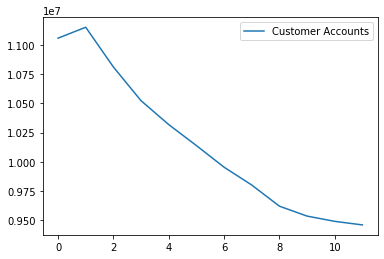

In [11]:
# plt.figure(figsize=(15,6))
ELEC_CUSTOMERS_RES_TX.plot()

In [14]:
# Loop through the call to get information calling API
state = ["TX", "NY", "CA"]
sector =["RES","COM","IND","TRA","OTH"]

for i in range(len(state)):
    for r in range(len(sector)):
        series_id = "ELEC.SALES."+state[i]+"-"+sector[r]+".A"
        url = ("http://api.eia.gov/series/?api_key=cfb84a9cea8ca25f6059c485600b3b6a&series_id="+ str(series_id))
        data = (requests.get(url).json())
        pprint(data)

{'request': {'command': 'series', 'series_id': 'ELEC.SALES.TX-RES.A'},
 'series': [{'copyright': 'None',
             'data': [['2019', 152975.70949],
                      ['2018', 157267.91301],
                      ['2017', 144242.13103],
                      ['2016', 145973.18095],
                      ['2015', 145651.91301],
                      ['2014', 140899.74399],
                      ['2013', 140272.60705],
                      ['2012', 137411.633],
                      ['2011', 145654.22803],
                      ['2010', 137161.40199],
                      ['2009', 129814.89999],
                      ['2008', 128240.04801],
                      ['2007', 124921.21401],
                      ['2006', 126843.22499],
                      ['2005', 126561.91301],
                      ['2004', 120329.87998],
                      ['2003', 121354.826],
                      ['2002', 121435.11],
                      ['2001', 117342.77901]],
             'description':

{'request': {'command': 'series', 'series_id': 'ELEC.SALES.NY-COM.A'},
 'series': [{'copyright': 'None',
             'data': [['2019', 74737.92704],
                      ['2018', 76745.46303],
                      ['2017', 75333.48502],
                      ['2016', 76506.968],
                      ['2015', 77005.62502],
                      ['2014', 76540.81303],
                      ['2013', 76342.31901],
                      ['2012', 76017.96201],
                      ['2011', 76405.8],
                      ['2010', 77275.67599],
                      ['2009', 75347.11801],
                      ['2008', 77415.59602],
                      ['2007', 74326.10399],
                      ['2006', 76028.58601],
                      ['2005', 76821.80899],
                      ['2004', 74377.92899],
                      ['2003', 72495.187],
                      ['2002', 62270.51801],
                      ['2001', 60806.218]],
             'description': 'Electricity sold to 

{'request': {'command': 'series', 'series_id': 'ELEC.SALES.CA-IND.A'},
 'series': [{'copyright': 'None',
             'data': [['2019', 46896.71276],
                      ['2018', 49587.913],
                      ['2017', 48627.40601],
                      ['2016', 50979.12401],
                      ['2015', 52562.21001],
                      ['2014', 52898.43],
                      ['2013', 54396.99901],
                      ['2012', 46951.71398],
                      ['2011', 49935.77602],
                      ['2010', 49301.02501],
                      ['2009', 47835.152],
                      ['2008', 51031.27002],
                      ['2007', 50538.234],
                      ['2006', 50990.893],
                      ['2005', 50242.28902],
                      ['2004', 48811.58601],
                      ['2003', 49908.92201],
                      ['2002', 48447.725],
                      ['2001', 63041.25299]],
             'description': 'Electricity sold to ind